In [ ]:
# 폰트

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#### 금리 변화추이 시각화
#### 실업률, 소비자 물가지수, 생산자 물가지수와 금리의 연관성 파악 시각화

##### 금리

In [27]:
import pandas as pd

ir = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Unclock-watchers/미국 금리.xlsx', engine='openpyxl')


# 발표일 컬럼을 날짜 형식으로 변환
ir['Date'] = pd.to_datetime(ir['Date'], unit='D', origin='1899-12-30')

# NAN 행 삭제
ir.dropna(inplace = True)

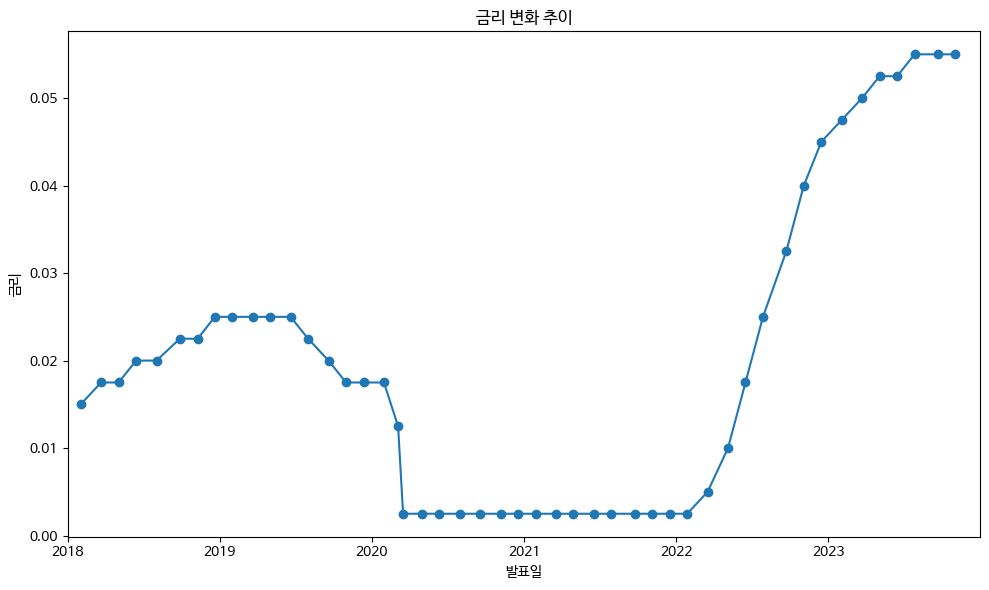

In [28]:
# 시각화
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 발표일을 날짜 형식으로 변환
ir['Date'] = pd.to_datetime(ir['Date'])

# 그래프
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10, 6))
plt.plot(ir['Date'], ir['IR'], marker='o', linestyle='-')
plt.title('금리 변화 추이')
plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2023-12-31'))
plt.xlabel('발표일')
plt.ylabel('금리')
plt.tight_layout()

# 그래프 표시
plt.show()

##### 금리 & 실업률

In [29]:
import pandas as pd
import re

ur = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Unclock-watchers/미국 실업률.xlsx', engine='openpyxl')


# 발표일 컬럼을 날짜 형식으로 변환
ur['Date'] = ur['Date'].str.extract(r'(\d{4}년 \d{2}월 \d{2}일)')
ur['Date'] = pd.to_datetime(ur['Date'], format='%Y년 %m월 %d일')

# NAN 행 삭제
ur.dropna(inplace = True)
ur

,Date,UR
1,2023-11-03,0.039
2,2023-10-06,0.038
3,2023-09-01,0.038
4,2023-08-04,0.035
5,2023-07-07,0.036
...,...,...
67,2018-05-04,0.039
68,2018-04-06,0.041
69,2018-03-09,0.041
70,2018-02-02,0.041


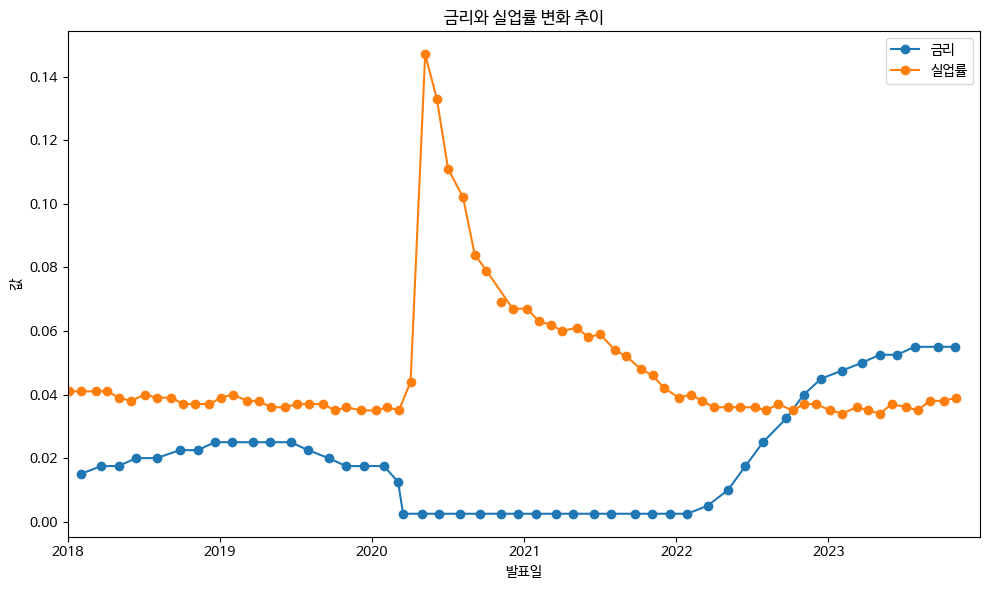

In [41]:
# 데이터프레임을 '발표일' 기준으로 합침
df_combined_ur = pd.merge(ir, ur, on='Date', how='outer')

# '발표일' 컬럼을 날짜형으로 변환
df_combined_ur['Date'] = pd.to_datetime(df_combined_ur['Date'])

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 금리 선 그래프
plt.plot(df_combined_ur['Date'], df_combined_ur['IR'], marker='o', linestyle='-', label='금리')

# 실업률 선 그래프
plt.plot(df_combined_ur['Date'], df_combined_ur['UR'], marker='o', linestyle='-', label='실업률')

plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2023-12-31'))
plt.title('금리와 실업률 변화 추이')
plt.xlabel('발표일')
plt.ylabel('값')
plt.legend()
plt.tight_layout()

# 그래프 표시
plt.show()

##### 금리 & 소비자 물가지수

In [34]:
import pandas as pd
import re

cpi = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Unclock-watchers/미국 소비자물가지수.xlsx', engine='openpyxl')


# 발표일 컬럼을 날짜 형식으로 변환
cpi['Date'] = cpi['Date'].str.extract(r'(\d{4}년 \d{2}월 \d{2}일)')
cpi['Date'] = pd.to_datetime(cpi['Date'], format='%Y년 %m월 %d일')

cpi

,Date,CPI
0,2023-11-14,0.032
1,2023-10-12,0.037
2,2023-09-13,0.037
3,2023-08-10,0.032
4,2023-07-12,0.030
...,...,...
66,2018-05-10,0.025
67,2018-04-11,0.024
68,2018-03-13,0.022
69,2018-02-14,0.021


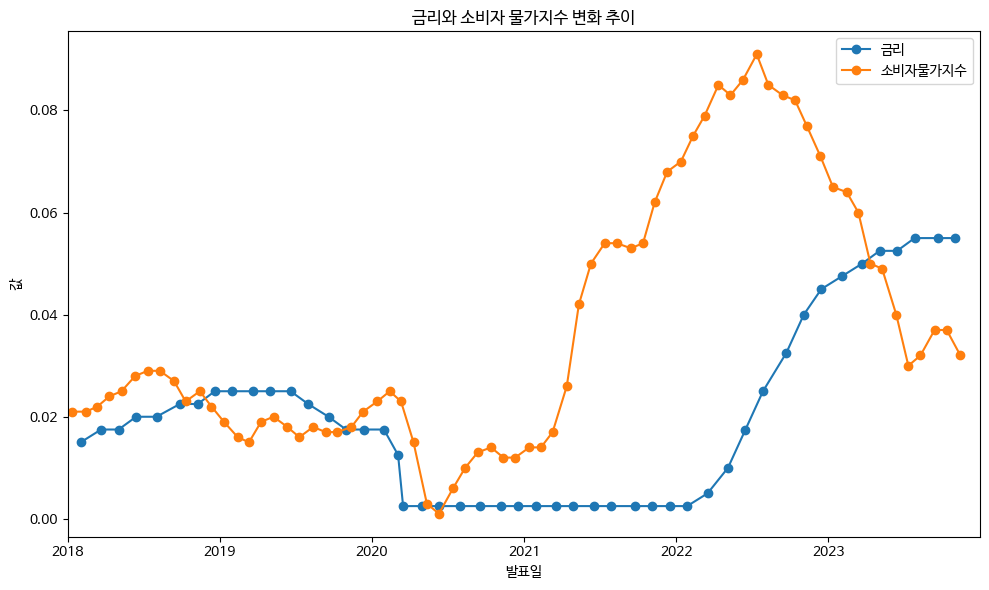

In [40]:
# 데이터프레임을 '발표일' 기준으로 합침
df_combined_cpi = pd.merge(ir, cpi, on='Date', how='outer')

# '발표일' 컬럼을 날짜형으로 변환
df_combined_cpi['Date'] = pd.to_datetime(df_combined_cpi['Date'])

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 금리 선 그래프
plt.plot(df_combined_cpi['Date'], df_combined_cpi['IR'], marker='o', linestyle='-', label='금리')

# 실업률 선 그래프
plt.plot(df_combined_cpi['Date'], df_combined_cpi['CPI'], marker='o', linestyle='-', label='소비자물가지수')

plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2023-12-31'))
plt.title('금리와 소비자 물가지수 변화 추이')
plt.xlabel('발표일')
plt.ylabel('값')
plt.legend()
plt.tight_layout()

# 그래프 표시
plt.show()

##### 금리 & 생산자 물가지수

In [46]:
import pandas as pd
import re

ppi = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Unclock-watchers/미국 생산자물가지수.xlsx', engine='openpyxl')


# 발표일 컬럼을 날짜 형식으로 변환
ppi['Date'] = ppi['Date'].str.extract(r'(\d{4}년 \d{2}월 \d{2}일)')
ppi['Date'] = pd.to_datetime(ppi['Date'], format='%Y년 %m월 %d일')

ppi

,Date,PPI
0,2023-11-15,0.013
1,2023-10-11,0.022
2,2023-09-14,0.016
3,2023-08-11,0.008
4,2023-07-13,0.001
...,...,...
66,2018-05-09,0.026
67,2018-04-10,0.030
68,2018-03-14,0.028
69,2018-02-15,0.027


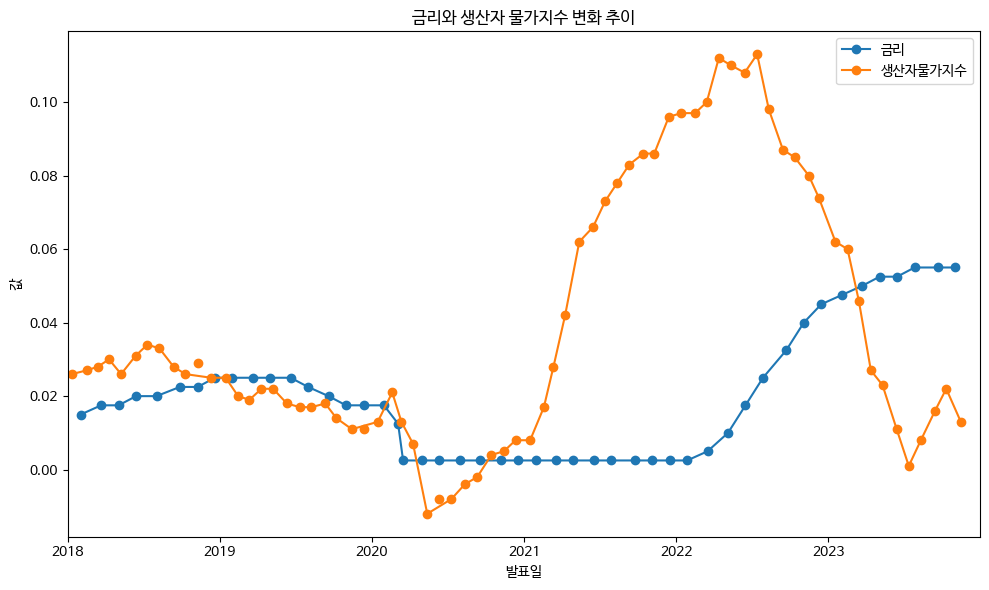

In [48]:
# 데이터프레임을 '발표일' 기준으로 합침
df_combined_ppi = pd.merge(ir, ppi, on='Date', how='outer')

# '발표일' 컬럼을 날짜형으로 변환
df_combined_ppi['Date'] = pd.to_datetime(df_combined_ppi['Date'])

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 금리 선 그래프
plt.plot(df_combined_ppi['Date'], df_combined_ppi['IR'], marker='o', linestyle='-', label='금리')

# 실업률 선 그래프
plt.plot(df_combined_ppi['Date'], df_combined_ppi['PPI'], marker='o', linestyle='-', label='생산자물가지수')

plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2023-12-31'))
plt.title('금리와 생산자 물가지수 변화 추이')
plt.xlabel('발표일')
plt.ylabel('값')
plt.legend()
plt.tight_layout()

# 그래프 표시
plt.show()